# Dimtributor: a python package for automatical dimesion attribution
As a data analyst, one of out daily work is to explain the fluctuation of indicators. And dimension drill down is a common way to do that, which finds the dimesion most likely to blame for the fluctuation.</br>
If we do it with our hand, different analysts may get different conclusions, and it takes a lot of time especially when there are many dimensions or many indicators to deal with.</br>
In this python package, I use JS Divergence with decision tree to do dimension drill down.</br>
Since it create the tree with a specific algorithm, we get the same conclusion no matter how many times you run it.
With just a few lines of codes, it can help you to save a lot of time to deal with this daily work of fluctuation of indicators.

# BASIC IDEAS
Hypothesis that your most important indicator dau dropped 30%, you want to find which specific value of which dimesion explain the most part of the decline.</br></br>
Let's say, you only have two dimesions,cities and channels. For the cities ,all cities dropped exactly 30%,but for channels, channel A decreased 80%,and channel B and C increased 50%. In this case, we may want to blame channels for the drop of dau.</br></br>
Here actually we are compare the real happened with should happened, we should blame the dimesion if it's a big "surprise". We calculate this "surprise" with JS Divergence, since it can help to tell how big the difference is for two distributions(real happened distribution and should happened distribution).</br>
In this example, we should split our tree with the dimesion of channels.</br>
</br>
But on which specific value we should split? we check for each value of channel(A,B,C), we calculte the surprise with JS Divergence after we exlcude this value. Say we get the JS Divergence 0.1 when we exclude channel A,0.3 for B,0.2 for C, then we should split the decision tree at channel A, which means the surprise is the samllest after we exclude A.</br></br>
That's basically all the theories for this packages.
A little difference when we want to deal with a rate indicator(numerator/denominator,like conversion rate,for example CTR=click/impression),but we can transfer it to a same question. For a dimesion say channel with two value of A and B,we can change </br>
CTR</br>
=click/impression</br>
=(click_A+click_B)/(impression_A+impression_B)</br>
=click_A/impression_A*impression_A/(impression_A+impression_B)+click_B/impression_B\*impression_B/(impression_A+impression_B)</br>
=CTR_A\*impressoin_share_A+CTR_B\*impressoin_share_B.</br>
In this way we can transfer a rate problem to a quantity problem.


# Install
pip install dimtributor


# Example: for quantity indicator

In [2]:
import pandas as pd 
import numpy as np
from dimtributor.tree import DimtributorTree

df_quantity = pd.read_csv('data_quantity.csv')
df_quantity.sample(5)

,group_name,app_name,platform,country,language,create_datediff,orders
14716,base,tv,ios,K,a,0day,1
4777,base,tv,android,S,a,>90day,47
8606,base,ms,android,E,a,0day,9
5497,this,tv,ios,s,r,8-30day,31
2670,this,ms,android,R,n,1-7day,207


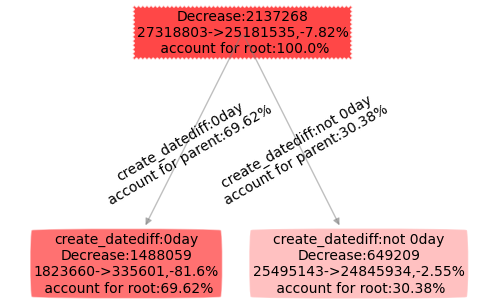

outtree: {'Decrease:2137268\n27318803->25181535,-7.82%\n account for root:100.0%': {'create_datediff:0day\n account for parent:69.62%': 'create_datediff:0day\nDecrease:1488059\n1823660->335601,-81.6%\n account for root:69.62%', 'create_datediff:not 0day\n account for parent:30.38%': 'create_datediff:not 0day\nDecrease:649209\n25495143->24845934,-2.55%\n account for root:30.38%'}}
png_path: /Users/kennyzhangchao/Desktop/starx_myself/python_code/dimtributor_copy/dim_attribution_1696597001.png


In [3]:
group = 'group_name' 
#columns name for group,with two values of base and this
#,if the dau of 20220102 dropped 30% compare to 20220101
#,then the value of group for 20230101 is "base"
#,the the value of group for 20230102 is "this"

value_type = 'quantity' # you are deal with a quantity indicator
dims = ["app_name","platform","country","language","create_datediff"] #all the dimensions you interested
y = 'orders' # the indicator you want to analysis

dmat_quantity = DimtributorTree(df_quantity,value_type,group,dims,y)
dmat_quantity.createtree()
print("outtree:",dmat_quantity.outtree)
print("png_path:",dmat_quantity.png_path)

# Example: for rate indicator

In [3]:
import pandas as pd 
import numpy as np
from dimtributor.tree import DimtributorTree

df_rate = pd.read_csv('data_rate.csv')
df_rate.sample(5)

,group_name,app_name,platform,region,language,denominator,numerator,conversion_rate
1661,base,ms,ios,R,r,2,0,0.000000
2009,base,md,android,N,s,1,0,0.000000
2579,this,ms,ios,U,a,1,0,0.000000
453,this,ms,ios,E,i,80,28,0.350000
147,this,ms,android,s,y,2160,48,0.033333


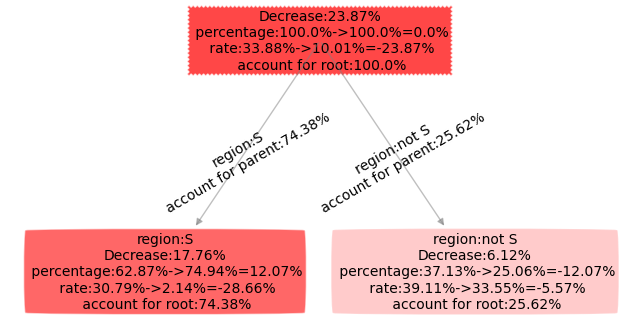

outtree: {'Decrease:23.87%\n percentage:100.0%->100.0%=0.0%\n rate:33.88%->10.01%=-23.87%\n account for root:100.0%': {'region:S\n account for parent:74.38%': 'region:S\nDecrease:17.76%\n percentage:62.87%->74.94%=12.07%\n rate:30.79%->2.14%=-28.66%\n account for root:74.38%', 'region:not S\n account for parent:25.62%': 'region:not S\nDecrease:6.12%\n percentage:37.13%->25.06%=-12.07%\n rate:39.11%->33.55%=-5.57%\n account for root:25.62%'}}
png_path: /xx/rate_outtree.png


In [4]:
group = 'group_name' 
#columns name for group,with two values of base and this
#,if the conversion_rate of 20220102 dropped 1% compare to 20220101
#,then the value of group for 20230101 is "base"
#,the the value of group for 20230102 is "this"

value_type = 'rate' # you are deal with a rate(or conversion) indicator
dims = ["app_name","platform","region","language"] #all the dimensions you interested
y = 'conversion_rate' # the indicator you want to analysis
d = 'denominator' #must for rate indicators
n = 'numerator' #must for rate indicators
dmat_rate = DimtributorTree(df_rate,value_type,group,dims,y,d,n)
dmat_rate.createtree()
print("outtree:",dmat_rate.outtree)
print("png_path:",dmat_rate.png_path)

# References
1. I updated my code with the reference of [Adtributor](https://www.usenix.org/conference/nsdi14/technical-sessions/presentation/bhagwan).
2. codes related to Desicion Tree referenced from the book of [《Machine Learning in Action》](https://www.manning.com/books/machine-learning-in-action ) by Peter Harrington.

# Github [dimtributor](https://github.com/wronganswer/dimtributor)

# TO BE DONE:
1、deal with chinese character display in png; </br>
2、use greater than/less than to deal with continues dimensions, like create_datediff;</br>
